In [1]:
import numpy as np
from scipy.special import gamma, eval_genlaguerre, factorial

class model:

    def __init__(self, D, a, xe):
        self.D = D
        self.a = a
        self.xe = xe
        self.h_barra = 1 #1.05457e-34
        self.m = 1
        self.lamnda = np.sqrt(2 * self.m * D) / (a * self.h_barra)

    def zeta(self, x):
        return  2*self.lamnda * np.exp(-self.a * (x -self.xe))

    def N_n(self, n):
        return np.sqrt(factorial(n) * (2*self.lamnda - 2*n - 1) / gamma(2*self.lamnda - n))

    def V(self, x):
        return self.D * (np.exp(-2*self.a*(x - self.xe)) - 2*np.exp(-self.a*(x - self.xe)))

    def E_n(self, n):
        return - pow(a*self.h_barra,2) * np.sqrt(self.lamnda - n - 0.5) / 2

    def phi_n(self, n, x):
        z = self.zeta(x)
        Nn = self.N_n(n)
        a = self.lamnda - n - 0.5
        return Nn * np.power(z,a) * np.exp(-z/2) * eval_genlaguerre(n, 2 * a, z)

In [2]:
x = np.linspace(-6, 10, 100)
data = model(D=7, a=0.16, xe=0)

Vx = data.V(x)
f0 = data.phi_n(0, x)
f1 = data.phi_n(1, x)
f2 = data.phi_n(2, x)
f3 = data.phi_n(3, x)
f0.shape

(100,)

<AxesSubplot:>

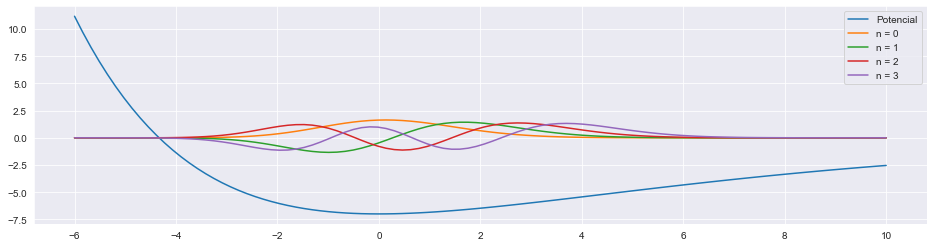

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
sns.set_style("darkgrid")
#plt.ylim(-0.6,0.6)
#plt.xlim(-6,11)
sns.lineplot(x = x, y = Vx, label='Potencial')
sns.lineplot(x = x, y = f0, label='n = 0')
sns.lineplot(x = x, y = f1, label='n = 1')
sns.lineplot(x = x, y = f2, label='n = 2')
sns.lineplot(x = x, y = f3, label='n = 3')

[]

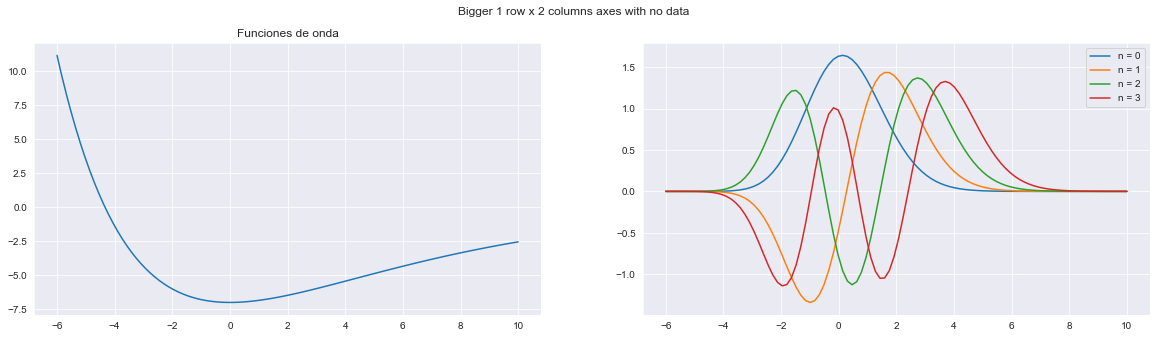

In [5]:
f = np.concatenate([f0.reshape(100,1), f1.reshape(100,1), f2.reshape(100,1), f3.reshape(100,1)], axis=1)
f.shape

fig, axes = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')
axes[0].set_title('potencial')
axes[0].plot(x, Vx, label='Potencial')
axes[0].set_title('Funciones de onda')
axes[1].plot(x, f)
axes[1].legend(['n = 0','n = 1','n = 2','n = 3'])
plt.plot()

In [6]:
def graficas(A):
    x = np.linspace(-6, 10, 100)
    fig, axes = plt.subplots(len(A), 2,  figsize=(19,15))
    fig.suptitle('Bigger 1 row x 2 columns axes with no data')

    for i in range(len(A)):
        data = model(D=7, a=A[i], xe=0)

        Vx = data.V(x)
        f0 = data.phi_n(0, x)
        f1 = data.phi_n(1, x)
        f2 = data.phi_n(2, x)
        f3 = data.phi_n(3, x)
        
        f = np.concatenate([f0.reshape(100,1), f1.reshape(100,1), f2.reshape(100,1), f3.reshape(100,1)], axis=1)
        f.shape

        axes[i,0].set_title('potencial a = {}'.format(A[i]))
        axes[i,0].plot(x, Vx, label='Potencial')

        axes[i,1].set_title('Funciones de onda')
        axes[i,1].plot(x, f)
        axes[i,1].legend(['n = 0','n = 1','n = 2','n = 3'])

    plt.plot()      

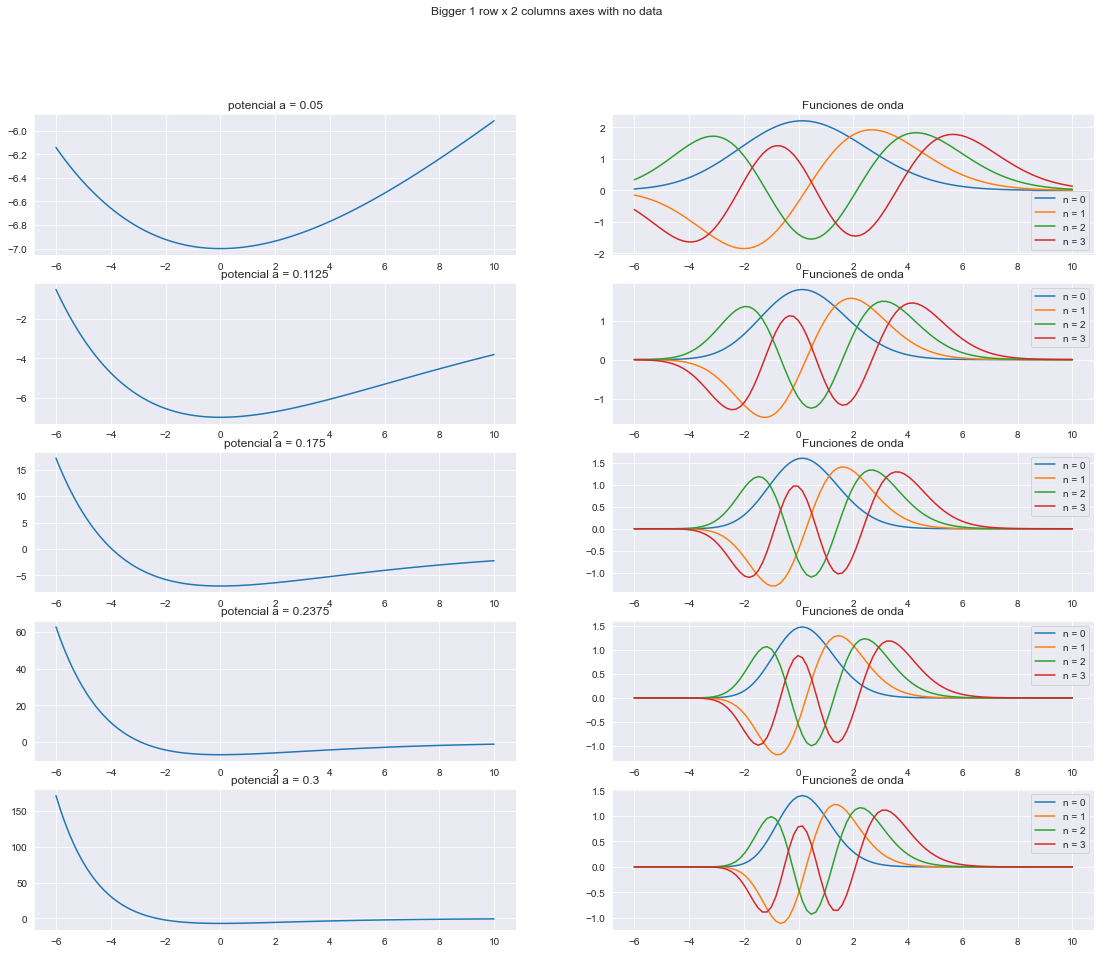

In [7]:
A = np.linspace(0.05, 0.3, 5)
graficas(A)

<AxesSubplot:>

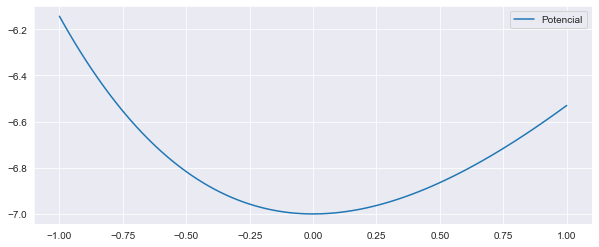

In [10]:
x = np.linspace(-1, 1, 100)
data = model(D=7, a=0.3, xe=0)

Vx = data.V(x)

plt.figure(figsize=(10,4))
sns.set_style("darkgrid")
#plt.ylim(-0.6,0.6)
#plt.xlim(-6,11)
sns.lineplot(x = x, y = Vx, label='Potencial')